# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
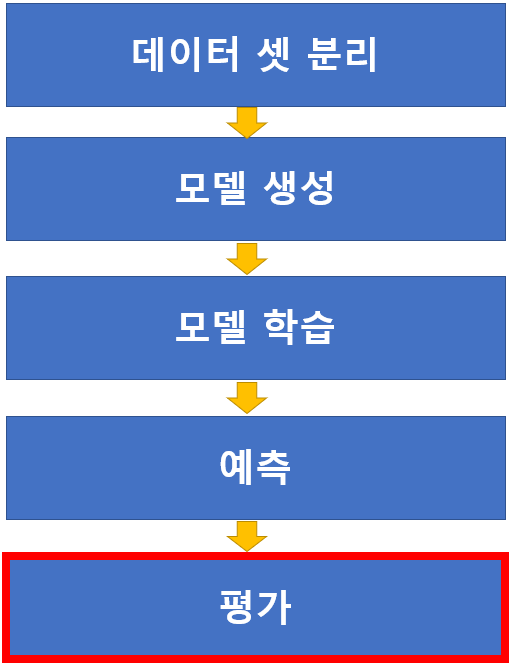

# 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC, AUC score

- <span style='background-color:#fff5b1'><b style='font-size:1.3em'>2번 정밀도 부터 6번 ROC,AUC score까지, 이진분류와 관련된 중요한 평가 지표 이다.

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

> - 정답, 예측값 => 연산, 처리하는 함수

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공

# <span style='background-color:#fff5b1'>분류(Classification) 평가 지표

##  이진 분류(Binary classification)의 양성(Positive)과 음성(Negative)
- 양성(Positive): 모델이 찾으려는(추론하려는) 주 대상
- 음성(Negative): 모델이 찾으려는(추론하려는) 주 대상이 아닌 것
- 예
    - 환자 분류 
        - 양성 - 환자, 음성 - 정상인
    - 스팸메일 분류 
        - 양성 - 스팸메일, 음성 - 정상메일
    - 금융사기 모델
        - 양성 - 사기거래, 음성 - 정상거래
        

><span style='background-color:#fff5b1'><b style='font-size:1.3em'> 2진 분류는 물음에 있어서 그 기준으로
>- 양성이면 => Positive
>- 음성이면 => Negative

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
>- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 이진 분류에서 **양성(Positive)에 대한 지표만 확인 할 수 없다.** 
- <span style='background-color:#fff5b1'>불균형 데이터의 경우</span> 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

## <span style='background-color:#fff5b1'>MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

- 칼라 이미지는 3차원 배열이다 (레드, 그린, 블루)

In [ ]:
digits.feature_names

![m5-2.png](images/m5-2.png)
![m5-3.png](images/m5-3.png)

In [4]:
# y(target) 값의 구성 분포
np.unique(y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [5]:
# X(feature) => pixel 값
np.min(X), np.max(X)

(0.0, 16.0)

In [6]:
# X, y 확인
print(y[1])
X[1].reshape(8, 8)

1


array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

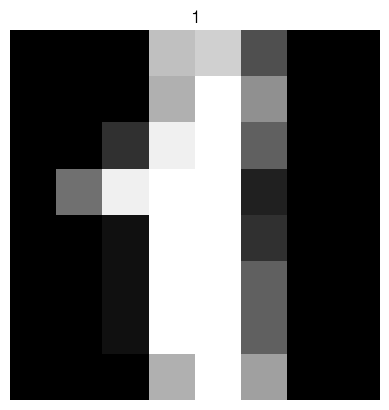

In [7]:
img_index = 1
img = X[img_index].reshape(8, 8)
plt.imshow(img, cmap = 'gray')
plt.title(y[img_index])
plt.axis('off') # spine을 제거

plt.show()

### <span style='background-color:#fff5b1'>불균형 데이터셋으로 만들기
이미지를 0 ~ 9 로 분류하는 문제를 위한 데이터셋 ===> 9와 나머지 숫자로 분류하는 데이터셋으로 변환 => 이 숫자가 9야?
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [70]:
y = np.where(y == 9, 1, 0) 

>- <b style='font-size:1.2em'>(조건, True 변환값, False 변환값) +의미 => y가 9인 것들을 조회해 True는 '1', False는 '0'으로 조회.

In [9]:
print(np.unique(y, return_counts = True))
np.unique(y, return_counts = True)[1]/y.size

(array([0, 1]), array([1617,  180]))


array([0.89983306, 0.10016694])

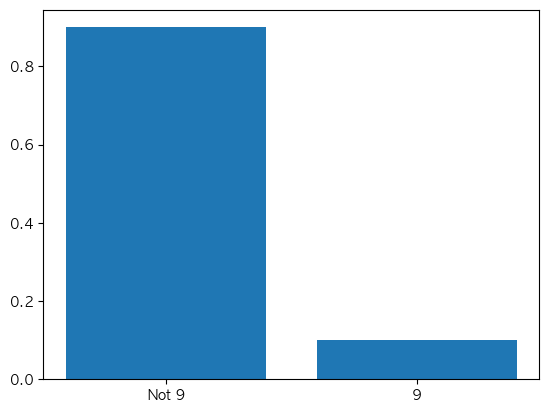

In [10]:
r = np.unique(y, return_counts = True)[1]/y.size
plt.bar([0, 1], r)
plt.xticks([0, 1], ['Not 9', '9'])
plt.show()

### 데이터셋 분할
- train/test 로 분할

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)
# test_size 생략 => 기본: 0.25

### 모델 생성 및 학습

#### <span style='background-color:#fff5b1'><b style='font-size:1.2em'>Dummy Model 정의
- <span style='background-color:#fff5b1'>dummy model: 진짜 모델이 아니라 모델을 흉내낸 모델을 말한다.
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [13]:
dummy_model = DummyClassifier(strategy = 'most_frequent') # y의 최빈값으로 무조건 추론.
dummy_model.fit(X_train, y_train)

# 정확도 검증
pred_train = dummy_model.predict(X_train)
pred_test = dummy_model.predict(X_test)

print('train 정확도: ', accuracy_score(y_train, pred_train))
print('test 정확도: ', accuracy_score(y_test, pred_test))

train 정확도:  0.8997772828507795
test 정확도:  0.9


In [14]:
np.unique(pred_train),np.unique(pred_test)

(array([0]), array([0]))

아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

## 혼동 행렬(Confusion Marix)
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

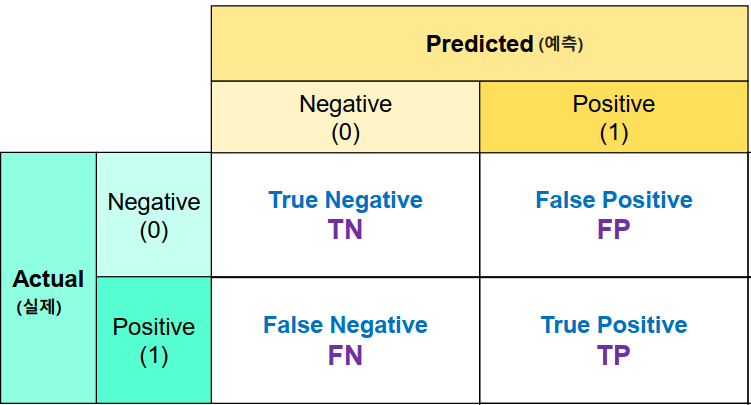

>- \ : 맞은 개수
>- / : 틀린 개수

>- <span style='background-color:#fff5b1'><b style='font-size:1.2em'>**TP(True Positive)** 
>    - 양성으로 예측했는데 맞은 개수
>- <span style='background-color:#fff5b1'><b style='font-size:1.2em'>**TN(True Negative)** 
>    - 음성으로 예측했는데 맞은 개수
>- <span style='background-color:#fff5b1'><b style='font-size:1.2em'>**FP(False Positive)** 
>    - 양성으로 예측했는데 틀린 개수 
>    - 음성을 양성으로 예측
>- <span style='background-color:#fff5b1'><b style='font-size:1.2em'>**FN(False Negative)** 
>    - 음성으로 예측했는데 틀린 개수 
>    - 양성을 음성으로 예측
>
>- 예)
>```python
>[[20, 6],
> [4,  40]]
>```

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진분류 뿐아니라 모든 분류의 기본 평가방식이다.
    
### <span style='background-color:#fff5b1'>양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### <span style='background-color:#fff5b1'>음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- <span style='background-color:#fff5b1'><b style='font-size:1.2em'>**Fall out(위양성률)**</b>
    - <span style='background-color:#fff5b1'>실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$

### + 필기.

![m5-1.png](images/m5-1.png)

> - <span style='background-color:#fff5b1'><b style='font-size:1.3em'> 재현율을 올리려면 FN을 낮춰야 한다.

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값),  ConfusionMatrixDisplay(Confusion marix 시각화클래스)**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [15]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score)

In [16]:
# 정확도
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.8997772828507795
0.9


In [17]:
print('confusion matrix')
print('train')
print(confusion_matrix(y_train, pred_train))
print('test')
print(confusion_matrix(y_test, pred_test))

confusion matrix
train
[[1212    0]
 [ 135    0]]
test
[[405   0]
 [ 45   0]]


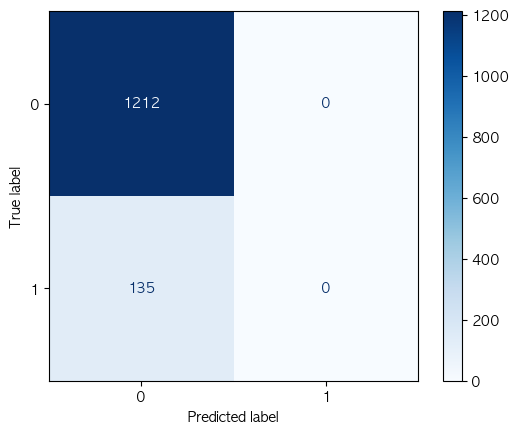

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, pred_train), # confusion matrix
                             )

disp.plot(cmap = 'Blues')
plt.show()

### <span style='background-color:#fff5b1'>dummy 모델 Accuracy, Recall, Precision, F1-Score

In [19]:
recall_score(y_train, pred_train), recall_score(y_test, pred_test)

(0.0, 0.0)

In [20]:
precision_score(y_train, pred_train), precision_score(y_test, pred_test) # 분모가 0 이여서 경고 뜬 것.

/Users/seokminlee/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/seokminlee/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [21]:
f1_score(y_train, pred_train), f1_score(y_test, pred_test) 
# Accuracy 만 보면 괜찮은 모델이지만 전체적으로 보면 말도 안되는 모델이다

(0.0, 0.0)

### <span style='background-color:#fff5b1'>classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

In [22]:
from sklearn.metrics import classification_report

report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1212
           1       0.00      0.00      0.00       135

    accuracy                           0.90      1347
   macro avg       0.45      0.50      0.47      1347
weighted avg       0.81      0.90      0.85      1347



/Users/seokminlee/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/seokminlee/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/seokminlee/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

### 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용 (max_depth=3)
- RandomForestClassifier 사용 (n_estimators=100, max_depth=3)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

>- <b style='font-size:1.3em'> '%' 그 라인의 내용 적용
>- <span style='background-color:#fff5b1'><b style='font-size:1.3em'> '%%' 셀 전체내용 적용 (따라서 맨 첫째줄에 넣어줘야 함!!!!)

In [25]:
%%writefile metrics.py
# 평가지표 저장 모듈
__version__ = 1.0
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score)
def plot_confusion_matrix(y, pred, title = None):
    '''
    
    Confusion Matrix 시각화 함수
    [parameter]
        y: ndarray =     정답
        pred: ndarray =  모델 예측값
        title: str =     그래프 제목
    [return]
    [exception]

    '''
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap = 'Blues')
    if title:
        plt.title(title)
    plt.show()

def print_metrics_classification(y, pred, title = None):
    '''
    
    classification(분류) 결과들을 출력하는 함수
    accuracy, recall, precision, f1-score
    [parameter]
        y: ndarray =     정답
        pred: ndarray =  모델 예측값
        title: str =     그래프 제목
    [return]
    [exception]
    
    '''
    if title:
        print(title)
    print('정확도(accuracy):', accuracy_score(y, pred))
    print('재현율/민감도(recall):', recall_score(y, pred))
    print('정밀도(precision):', precision_score(y, pred))
    print('F1-score:', f1_score(y, pred))

Overwriting metrics.py


In [26]:
from metrics import print_metrics_classification, plot_confusion_matrix

In [27]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state = 0)
# estimators에서 지정한 숫자 만큼 tree 만듬

# 학습
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# 검증
## 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree. predict(X_test)

pred_train_rfc = rfc.predict(X_train)
pred_test_rfc = rfc.predict(X_test)

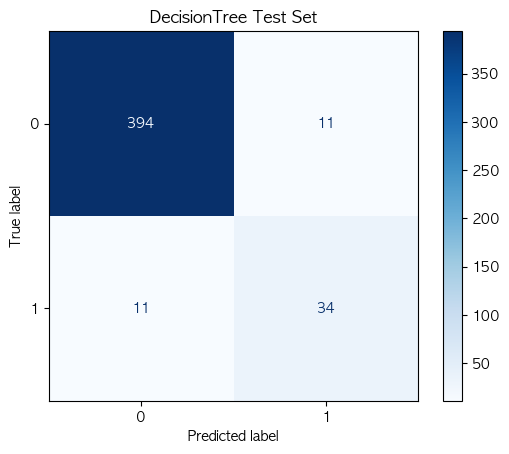

In [28]:
## confusion matrix
plot_confusion_matrix(y_test, pred_test_tree, "DecisionTree Test Set")

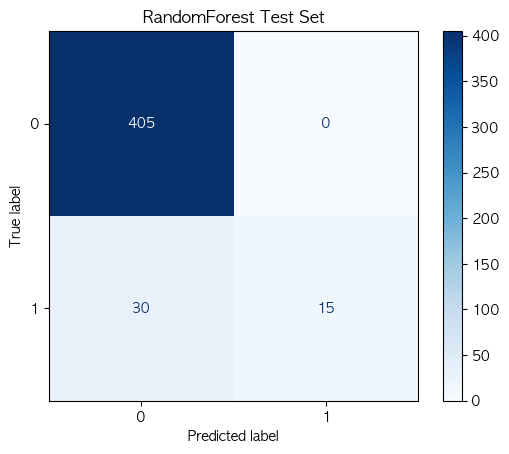

In [31]:
plot_confusion_matrix(y_test, pred_test_rfc, "RandomForest Test Set")

In [34]:
print('#################### Decision Tree 검증 결과 ####################')
print_metrics_classification(y_train, pred_train_tree, title = 'Train set')
print('='*100)
print_metrics_classification(y_test, pred_test_tree, title = 'Test set')

#################### Decision Tree 검증 결과 ####################
Train set
정확도(accuracy): 0.9465478841870824
재현율/민감도(recall): 0.8
정밀도(precision): 0.7058823529411765
F1-score: 0.7500000000000001
Test set
정확도(accuracy): 0.9511111111111111
재현율/민감도(recall): 0.7555555555555555
정밀도(precision): 0.7555555555555555
F1-score: 0.7555555555555555


In [32]:
print('#################### Random Forest 검증 결과 ####################')
print_metrics_classification(y_train, pred_train_rfc, title = 'Train set')
print('='*100)
print_metrics_classification(y_test, pred_test_rfc, title = 'Test set')

#################### Random Forest 검증 결과 #######################
Train set
정확도(accuracy): 0.9354120267260579
재현율/민감도(recall): 0.35555555555555557
정밀도(precision): 1.0
F1-score: 0.5245901639344263
Test set
정확도(accuracy): 0.9333333333333333
재현율/민감도(recall): 0.3333333333333333
정밀도(precision): 1.0
F1-score: 0.5


## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

>- <span style='background-color:#fff5b1'><b style='font-size:1.3em'>암환자( '1' ) , 정상( '0' )
> - <span style='background-color:#fff5b1'><b style='font-size:1.3em'>후처리</b></span> : 모델에서 나온 예측값 혹은 결과 값을 보기 좋게 하는 처리를 '후처리' 라고 한다. 

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

## <span style='background-color:#fff5b1'> Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

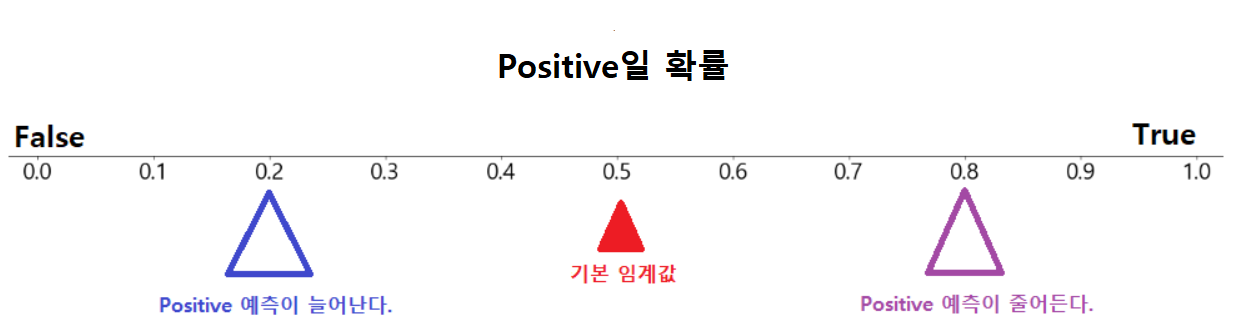

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

###  <span style='background-color:#fff5b1'>임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
>    - **임계값을 낮추면 <span style='background-color:#fff5b1'>재현율은 올라가고 정밀도는 낮아진다.**
>    - **임계값을 높이면 <span style='background-color:#fff5b1'>재현율은 낮아지고 정밀도는 올라간다.**
>    -  <span style='background-color:#fff5b1'>**재현율과 정밀도는 반비례 관계이다.**    
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

In [35]:
tree.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [37]:
r = tree.predict_proba(X_test[:5])
print(r.shape)
r

(5, 2)


array([[0.99173554, 0.00826446],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

>- 0일 확률 0.99183554, 1일 확률 0.00826446 ==> 따라서 추측된 값이 0일 확률이 높다

In [39]:
# 양성(1)의 확률만 추출  => 2번째 배열에 있는 값은 다 갖고와라, 그중에 1번째 자리에 있는 값만 조회해라.
print(r[:,1])
np.where(r[:,1] > 0.01, 1, 0)

[0.00826446 0.01304348 0.01304348 0.01304348 0.01304348]


array([0, 1, 1, 1, 1])

##### 임계값 변화에 따른 recall/precision 확인
- **<span style='background-color:#fff5b1'>precision_recall_curve(y_정답, positive_예측확률)**</span> 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [46]:
# DecisionTree, test set
from sklearn.metrics import precision_recall_curve
pos_proba_test = tree.predict_proba(X_test)[:,1] # [음성확률, 양성확률] = > 양성확률만 추출
# print(pos_proba_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba_test)

precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [50]:
# thresholds에 1을 추가
thresholds = np.append(thresholds, 1) # 한번만 하기!!!

In [51]:
thresholds

array([0.00826446, 0.01304348, 0.03389831, 0.04      , 0.14925373,
       0.54545455, 0.75      , 1.        ])

In [48]:
precisions

array([0.1       , 0.10757946, 0.43181818, 0.51388889, 0.56060606,
       0.75555556, 0.82352941, 1.        ])

In [49]:
recalls

array([1.        , 0.97777778, 0.84444444, 0.82222222, 0.82222222,
       0.75555556, 0.62222222, 0.        ])

In [54]:
# dataframe 로 확인
import pandas as pd

prc_df = pd.DataFrame({
    "Threshold": thresholds,
    "Recall": recalls,
    "Precisions": precisions
})
prc_df

,Threshold,Recall,Precisions
0,0.008264,1.000000,0.100000
1,0.013043,0.977778,0.107579
2,0.033898,0.844444,0.431818
3,0.040000,0.822222,0.513889
4,0.149254,0.822222,0.560606
5,0.545455,0.755556,0.755556
6,0.750000,0.622222,0.823529
7,1.000000,0.000000,1.000000


###### plotting

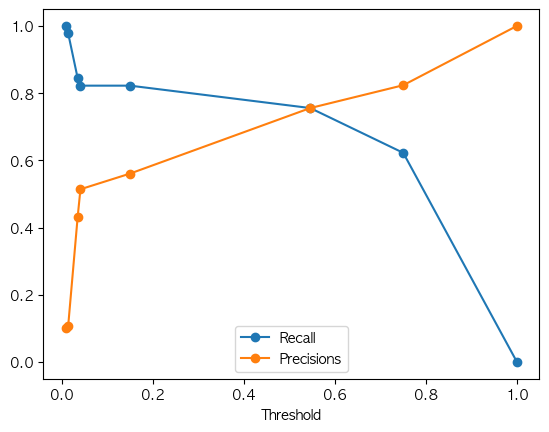

In [63]:
prc_df.set_index('Threshold').plot(marker = 'o')
plt.show()

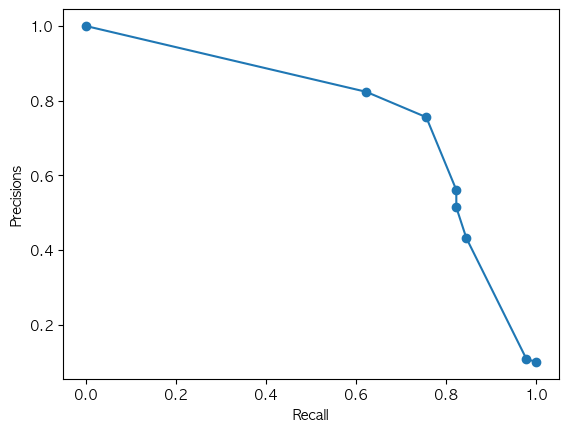

In [62]:
plt.plot(prc_df['Recall'], prc_df['Precisions'], marker = 'o')
plt.xlabel('Recall')
plt.ylabel('Precisions')
plt.show()

- precisions가 크면 Thresholds도 같이 커지고 recall은 낮아지는 구조.

### <span style='background-color:#fff5b1'>임계값 변경 후처리를 통한 recall/precision 변경 

##### 모델 예측 결과에 적용

In [65]:
# test set => 모델 양성 확률출론데 대해 임계값을 변경했을떄 recall, precision 계산
pos_test_tree = tree.predict_proba(X_test)[:, 1]
pos_test_rfc = rfc.predict_proba(X_test)[:, 1]


pred_test_tree = np.where(pos_test_tree > 0.1, 1, 0) # 0.1이 맞으면 1 다르면 0
print_metrics_classification(y_test, pred_test_tree, title = 'Treshold: 0.1')


Treshold: 0.1
정확도(accuracy): 0.9177777777777778
재현율/민감도(recall): 0.8222222222222222
정밀도(precision): 0.5606060606060606
F1-score: 0.6666666666666666


In [67]:
pred_test_tree = np.where(pos_test_tree > 0.5, 1, 0)
print_metrics_classification(y_test, pred_test_tree, title = 'Treshold: 0.5')

Treshold: 0.5
정확도(accuracy): 0.9511111111111111
재현율/민감도(recall): 0.7555555555555555
정밀도(precision): 0.7555555555555555
F1-score: 0.7555555555555555


In [68]:
pred_test_tree = np.where(pos_test_tree > 0.6, 1, 0)
print_metrics_classification(y_test, pred_test_tree, title = 'Treshold: 0.6')

Treshold: 0.6
정확도(accuracy): 0.9488888888888889
재현율/민감도(recall): 0.6222222222222222
정밀도(precision): 0.8235294117647058
F1-score: 0.7088607594936709


## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- Positive 확률 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
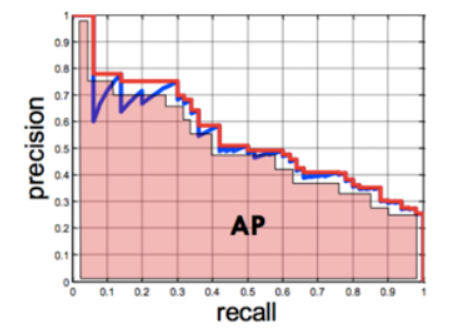   

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$

- **ROC Curve**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
    - FPR과 TPR의 변화는 비례해서 변화한다.
        - 낮은 임계값에서 큰 임계값으로 변경하면 높은 값에서 낮은 값으로 같이 변화한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

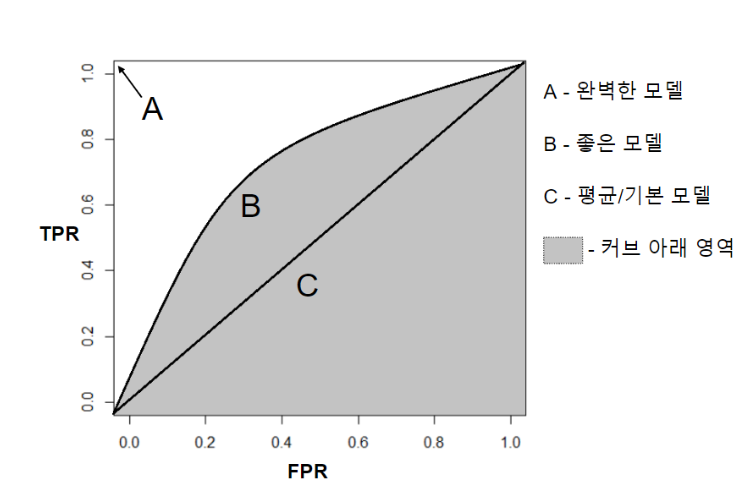

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

## ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- **Precision Recall Curve/AP Score**
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인